In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Importing data

In [2]:
dataTrain = pd.read_csv("extendedTrain.csv")
X_test = pd.read_csv("extendedTest.csv")
prediction = pd.read_csv("OUTPUT_LGBM.csv")

In [3]:
dataTrain = dataTrain.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
dTCols = dataTrain.columns.tolist()
y_train = dataTrain['TARGET']
X_train = dataTrain.drop('TARGET', axis=1)

In [4]:
y_train = y_train.apply(lambda x: 1 if x==1 else -1)

In [5]:
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train, random_state=42)

In [7]:
import lightgbm as lgb

In [8]:
params = {
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': 'auc',  
    'num_leaves': 15,  
    'learning_rate': 0.1,  
    'feature_fraction': 0.7,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'extra_tree' :True,
    'verbose': 0,
    'random_state' : 42
}

In [9]:
lgb_model = lgb.LGBMClassifier(**params)

In [10]:
lgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='auc')

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, extra_tree=True,
               feature_fraction=0.7, metric='auc', num_leaves=15,
               objective='binary', random_state=42, verbose=0)

### Shap

In [11]:
#pip install shap

In [12]:
import shap

c:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
explainer = shap.Explainer(lgb_model)
shap_values = explainer(X_test)

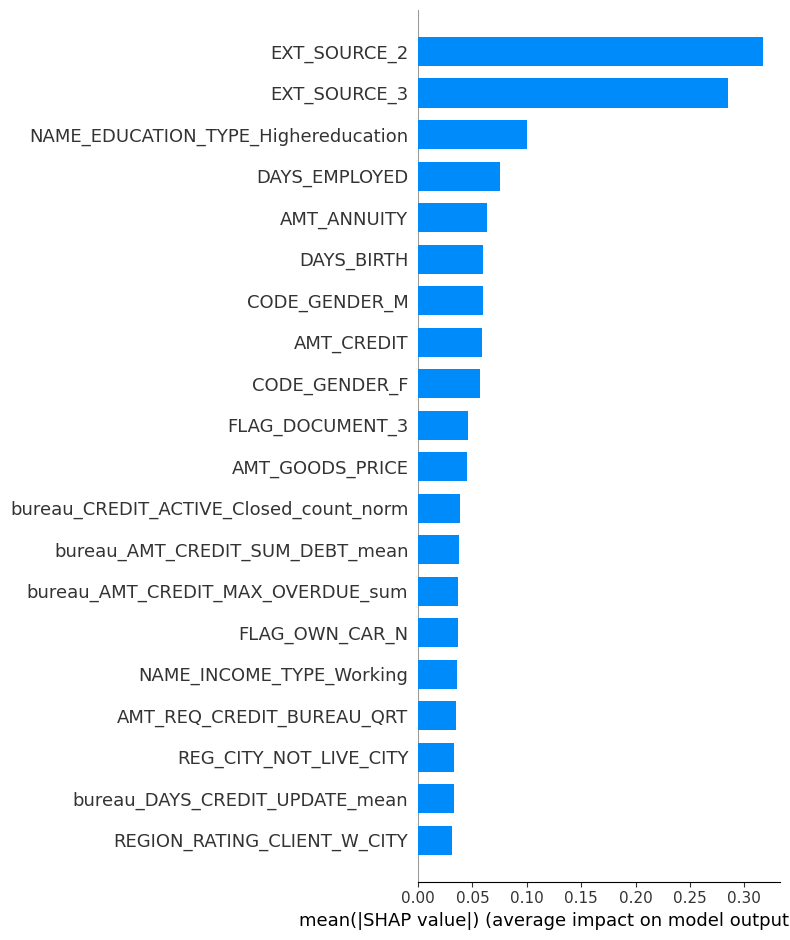

In [22]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

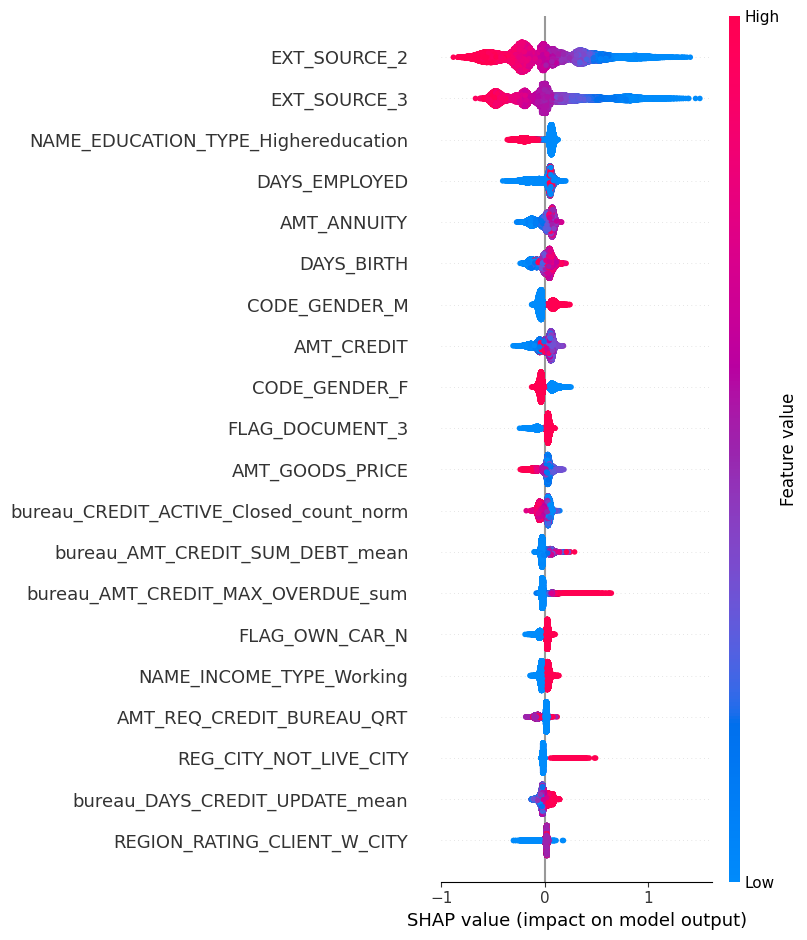

In [23]:
shap.summary_plot(shap_values, X_test)